# Amazon dataset generation

Goes through the process of downloading data from the 2018 Amazon dataset and places it locally in a SQlite Database for further processing, along with item images. This process removes some obvious duplicate items.

After this process finish you will have available the following files

- `data/amazon/<dataset>.sqlite` It has basic item and review data, filtered by a certain timeframe. For example,  from January to December 2018. This limits the dataset size and helps speeding up the process as some datasets are massive.
- `data/amazon/<dataset>_product_images/*.jpg` with one image per item. Note more than one item can have the same image.

The process will also download the product metadata and the full review dataset and we proceed to filter it down later. Take into account the data can be massive and you might need a couple of dozens GB of space to store the images, metadata, reviews,images and all the generated embeddings for each dataset.

If we didn't do it already, install the required libraries.

In [1]:
%pip install -r requirements.txt

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-gt47wor0/clip_9c8b96a02fa742408e725f7763ee43aa
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-gt47wor0/clip_9c8b96a02fa742408e725f7763ee43aa
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 726.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━

# 1. Download Data

Those are the datasets used for the experiments. In this notebook we process one dataset at a time. For each dataset we filter data by a period of time. We use different time ranges becuase each dataset has a different density of reviews: people give more reviews to Clothing articles to Baby products.

In [2]:
# Dataset name -> min date of reviews and max date of reviews
DATASETS = {
    'Baby': ('2018-01-01', '2018-10-01'),
    'Clothing_Shoes_and_Jewelry': ('2018-03-01', '2018-10-01'),
    'Home_and_Kitchen': ('2018-03-01', '2018-10-01'),
    'Movies_and_TV': ('2017-01-01', '2018-10-01'),
    'Musical_Instruments': ('2017-01-01', '2018-10-01'),
    'Office_Products': ('2018-01-01', '2018-10-01'),
    'Sports_and_Outdoors': ('2018-01-01', '2018-10-01'),
    'Toys_and_Games': ('2018-01-01', '2018-10-01'),
}

# 2. Import data to database

Let's set a simple dataset `Musical_Instruments`. 

In [3]:
DATASET = 'Musical_Instruments'

In [4]:
from datetime import date
from amazon_dataset import load_amazon_dataset


try:
    min_date, max_date = DATASETS[DATASET]
    load_amazon_dataset(
        DATASET,
        force=False,
        min_date=date.fromisoformat(min_date),
        max_date=date.fromisoformat(max_date),
        min_reviews_per_reviewer=5,
        min_reviews_per_asin=5
    )
except ValueError as ex:
    # This is OK, since we don't want to blow up the Database. Extracting
    # data can take some minutes
    print(ex)

FileExistsError: [Errno 17] File exists: 'data'

In [ ]:
from amazon_dataset import reviews_df

reviews = reviews_df(DATASET)
print(f"There are {len(reviews)} reviews in the dataset.")
reviews.sample(n=5)

In [7]:
from amazon_dataset import items_df

products = items_df(DATASET)
print(f"There are {len(products)} products in the dataset.")
products.sample(n=3)

There are 8460 products in the dataset.


,asin,description,title,brand,main_cat,rank,price,image_slug,image_url,feature,category,tech_detail,item_id
id,,,,,,,,,,,,,
99626,B00U5T6JNS,"6.1"" x 7.5"" Midsize Aluminum Studio Monitor St...",IsoAcoustics Aperta Isolation Stands - Black (...,IsoAcoustics,Musical Instruments,">#9,306 in Musical Instruments (See Top 100 in...",$34.99,"[41dBydyn44L, 41AIc1D0IqL, 41c-nlsscKL]",[https://images-na.ssl-images-amazon.com/image...,[IsoAcoustics 2x Aperta Stand - IsoAcoustics 2...,"[Musical Instruments, Studio Recording Equipment]",None,B00U5T6JNS
665,B0000WS0SC,The microKORG boasts the same dual-oscillator ...,Korg microKorg 37-Key Analog Modeling Synthesi...,Korg,Musical Instruments,">#17,251 in Musical Instruments (See Top 100 i...",$73.49,"[41SiGjVS5qL, 31OVhvxMbjL, 51gu063yzKL, 51X8p-...",[https://images-na.ssl-images-amazon.com/image...,[Sound Generation Method: Analog Modeling Synt...,"[Musical Instruments, Electronic Music, DJ & K...",None,B0000WS0SC
101035,B00VNSU378,Specifications:<br> Cleaning cloth size: 25.5 ...,Andoer Cleaning Kit Cleaning Cloth Mouthpiece ...,Andoer,Musical Instruments,">#12,850 in Musical Instruments (See Top 100 i...",$6.99,"[41cSoUAYHWL, 31FR3D%2BUa1L, 41NlJTEzgnL, 3125...",[https://images-na.ssl-images-amazon.com/image...,"[Includes a mouthpiece brush, reed case, clean...","[Musical Instruments, Instrument Accessories, ...",None,B00VNSU378


In [8]:
some_product = products.sample(n=1).iloc[0].to_frame('value')
some_product

,value
asin,B000CZ0RKG
description,"<div class=""aplus""> <h4>BEHRINGER V-TONE GUITA..."
title,Behringer V-Tone Guitar Driver DI GDI21 Amp Mo...
brand,Behringer
main_cat,Musical Instruments
rank,">#12,768 in Musical Instruments (See Top 100 i..."
price,$7.99
image_slug,"[5102m9YpvaL, 51JpX0C7-GL, 517CfL1AIQL]"
image_url,[https://images-na.ssl-images-amazon.com/image...
feature,[Analog guitar modeling preamp/stompbox with D...


In [9]:
from amazon_dataset import product_images_df

some_images = product_images_df(DATASET).sample(n=15)
some_images

,url,main,slug,product_id
id,,,,
12590,https://images-na.ssl-images-amazon.com/images...,False,51txgniO3iL,83870
24352,https://images-na.ssl-images-amazon.com/images...,False,516bqpeyNDL,115548
5737,https://images-na.ssl-images-amazon.com/images...,False,41N%2BXexXXXL,41104
11825,https://images-na.ssl-images-amazon.com/images...,False,4136vfngKSL,81036
45,https://images-na.ssl-images-amazon.com/images...,False,41JlW8yhI1L,437
13452,https://images-na.ssl-images-amazon.com/images...,False,41FpOCORWAL,87408
26580,https://images-na.ssl-images-amazon.com/images...,False,31I34LHhBbL,119000
18374,https://images-na.ssl-images-amazon.com/images...,False,41a-mBtoCxL,103037
16539,https://images-na.ssl-images-amazon.com/images...,False,41BolWYTEZL,98467


Download _main_ product images using the ASIN. 

This process etrieves around 50% of product images. We do this instead of relying on the dataset image because the dataset do not specify which image is the main one that a user sees in the website. The main image often shows the item with a white background and nothing else and it is what user see in the search results. Non-main images can have text which doesn't represent the product, such as size charts, or models using the product. 
Also, product images from the dataset are not reliable either, as can be no longer available as they were scrapped from the website in 2018.  We do use the dataset product images if this method doesn't work.

In [11]:
#TODO: remove
from importlib import reload
import amazon_dataset
reload(amazon_dataset)
amazon_dataset.download_main_product_images_webservice(DATASET)

#TODO: uncomment
#from amazon_dataset import download_main_product_images_webservice
#download_main_product_images_webservice(DATASET, resume=False)

100%|██████████| 8460/8460 [03:12<00:00, 43.85image/s, Errors 3408 https://images.amazon.com/images/P/B01HJETSF2.01.LZZZZZZZ.jpg]


Then some products won't have images. We can use the first image for each product
to store the product image

This only includes products with at least one parsed image!

In [13]:
from amazon_dataset import download_main_image_heuristic

download_main_image_heuristic(DATASET)

0product [00:00, ?product/s]


A sanity check to double check all images in the image folder are the same in the database

In [15]:
from amazon_dataset import check_all_images_are_ok

check_all_images_are_ok(DATASET)

In [16]:
from amazon_dataset import products_with_no_main_image_df

# Products still with no images at all!
products_with_no_main_image_df(DATASET)

,asin,description,title,brand,main_cat,rank,price
id,,,,,,,
1715,B0002D0EMO,Kyser Instrument Polish does more than just ke...,Kyser Instrument Polish,Kyser,Musical Instruments,">#30,312 in Musical Instruments (See Top 100 i...",$4.99
1899,B0002D0L5E,Custom Gauge plain strings.,Ernie Ball Nickel Plain Single Guitar String ....,Ernie Ball,Musical Instruments,">#6,880 in Musical Instruments (See Top 100 in...",
2116,B0002DURGW,This beautiful mountain dulcimer is a wonderfu...,Applecreek ACD100 Dulcimer,Trophy,Musical Instruments,">#13,298 in Musical Instruments (See Top 100 i...",$2.87
2189,B0002DV6J4,Denis Wick offers a range of mutes to suit all...,Denis Wick DW5504 Trumpet Straight Mute,Denis Wick,Musical Instruments,">#3,667 in Musical Instruments (See Top 100 in...",$39.91
2255,B0002DVD7E,Odyssey's CRS12 carpeted studio rack features ...,Odyssey CRS12 12 Space Carpeted Studio Rack,ODYSSEY,Musical Instruments,">#6,116 in Musical Instruments (See Top 100 in...",$26.24
...,...,...,...,...,...,...,...
118588,B01FPRUFQQ,This is a magnificent guitar pick that is grea...,V-PICKS Tradition Guitar Pick,V-Picks,Musical Instruments,">#63,767 in Musical Instruments (See Top 100 i...",$4.00
118760,B01FW4BV1U,This karaoke player has a sleek design matched...,"Karaoke USA GF839 Portable System, Black",Karaoke USA,Musical Instruments,">#25,134 in Musical Instruments (See Top 100 i...",$22.99
118838,B01FYUXIRW,Dip LED Light Emitting Diodes,LED Light Emitting Diodes (Yellow 5mm(100pcs)),KF,Musical Instruments,">#240,945 in Musical Instruments (See Top 100 ...",$7.99


And there are products with duplicate images

In [17]:
from amazon_dataset import delete_non_relevant_images

delete_non_relevant_images(DATASET)

Deleting non main product images
Getting duplicated product images
Deleting duplicated


In [18]:
check_all_images_are_ok(DATASET)

In [19]:
from amazon_dataset import vacuum_dataset

vacuum_dataset(DATASET)

# 2. Analyze Data

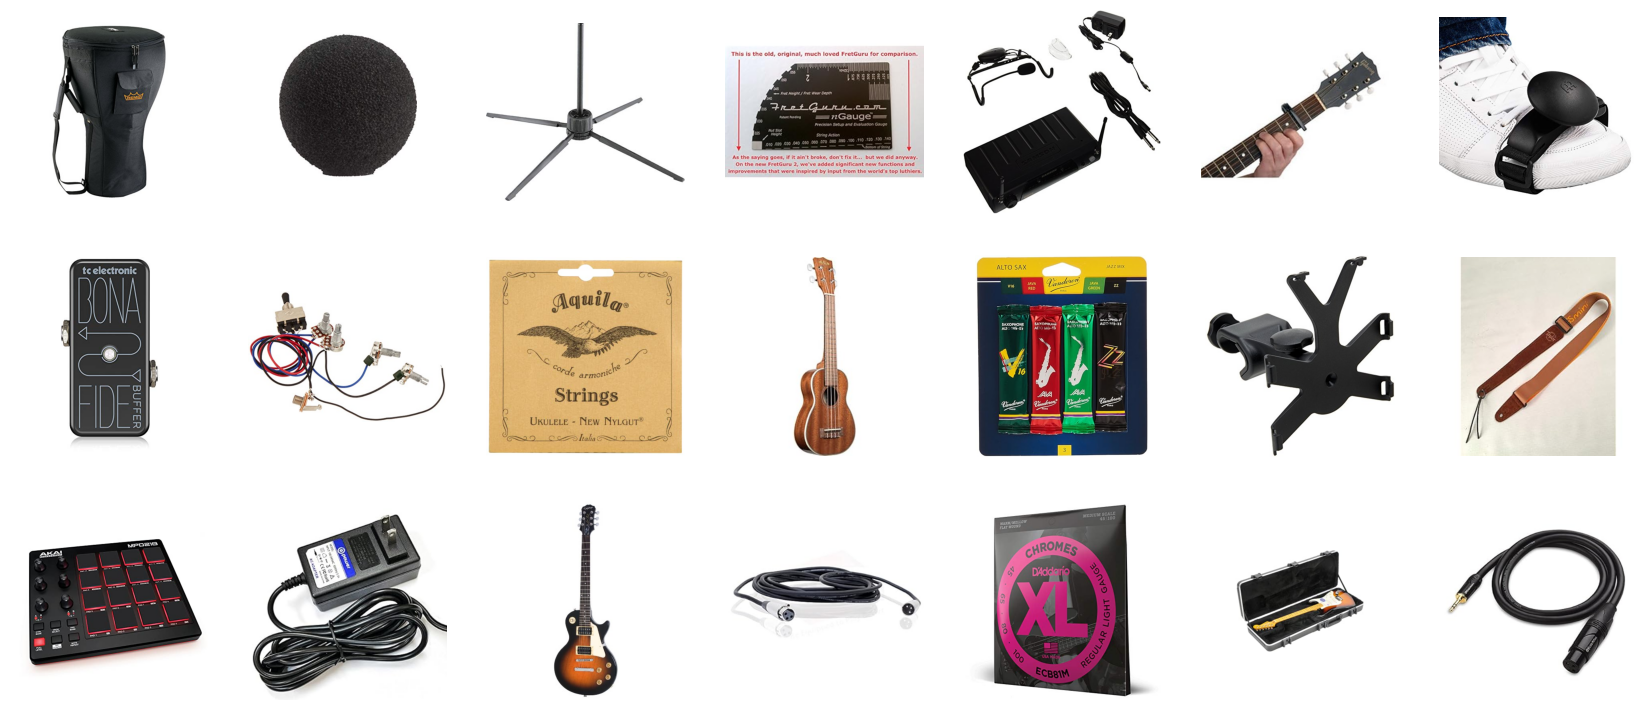

In [23]:
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from amazon_dataset import images_dir
import numpy as np
import math

def plot_images(paths: list[Path], titles=None, imgs_per_row=7, figsize=3):
    data = [ mpimg.imread(path) for path in paths]

    if titles is None:
        titles = ['' for _ in range(len(data))]
    
    n_rows = math.ceil(len(data) / imgs_per_row) 
    n_cols = min(imgs_per_row, len(data))

    f, axes = plt.subplots(n_rows,
                           n_cols,
                           squeeze=False,
                           figsize=(figsize*n_cols,figsize*n_rows))

    
    # We don't want ugly axes labels here
    for i in np.ndindex(*axes.shape):
        axes[i].set_axis_off()
    
    for i in range(len(data)):
        row_num = i // imgs_per_row
        row_col = i % imgs_per_row
        axis: Axes = axes[row_num, row_col]
        axis.set_title(titles[i])
        axis.imshow(data[i])
    plt.show()

some_images = product_images_df(DATASET).sample(n=21)
plot_images([
    images_dir(DATASET) / f'{slug}.jpg'
    for slug in some_images['slug']
])

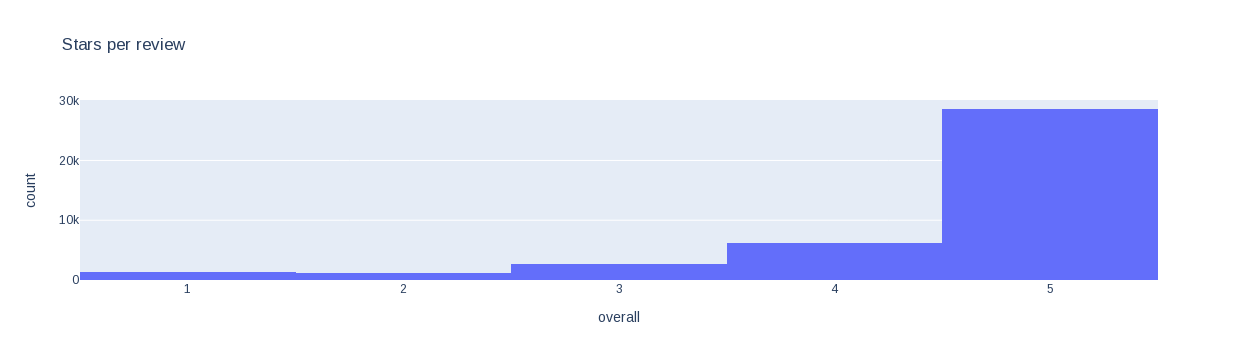

In [27]:
import plotly.express as px

fig = px.histogram(reviews, x="overall", title='Stars per review')
fig.show()

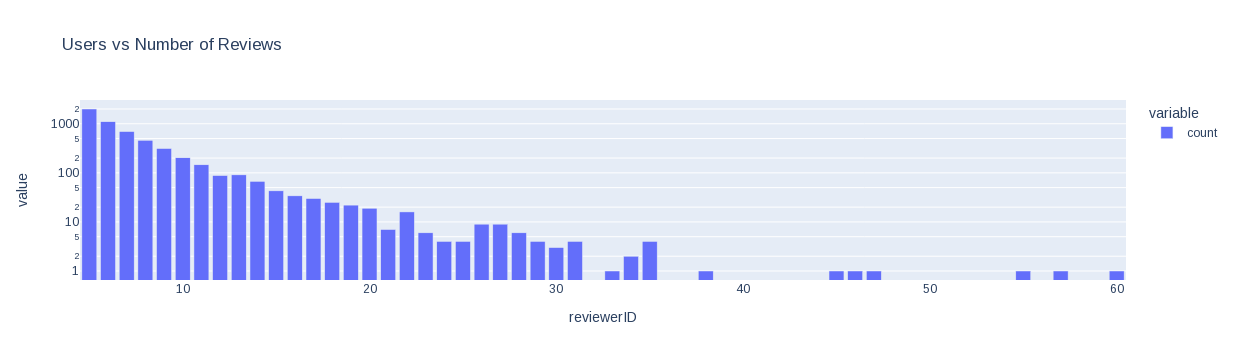

In [26]:
fig = px.bar(
    reviews.groupby('reviewerID')['reviewerID'].count().value_counts(),
    log_y=True,
    title='Users vs Number of Reviews'
)
fig.show()